In [19]:
import pandas as pd
import numpy as np
import seaborn as sns

from pathlib import Path

import matplotlib.pyplot as plt

In [21]:
STRUCTURE_ID = "SLC25A17"
STRUCTURE_NAME = "peroxisome"
FOLDER_ID = "RV"

In [22]:
base_folder = f"/allen/aics/animated-cell/Saurabh/cellpack-analysis/results/{STRUCTURE_ID}/{FOLDER_ID}/"

### load previously calculated correlations

Run `scripts/calculate_individual_PILR_correlations.sh` to calculate correlations

In [23]:
df = pd.read_csv(
    base_folder + "individual_PILR_corr.csv", index_col=[0, 1], header=[0, 1]
)

In [24]:
df.head()

channel          SLC25A17                                                    \
cellid             743916    743920    743921    745991    746203    746983   
channel  cellid                                                               
SLC25A17 743916  1.000000 -0.002525  0.000119  0.000573 -0.000649  0.006229   
         743920 -0.002525  1.000000 -0.002633  0.001373  0.003120  0.002087   
         743921  0.000119 -0.002633  1.000000  0.009601  0.008568 -0.000255   
         745991  0.000573  0.001373  0.009601  1.000000 -0.001918 -0.002551   
         746203 -0.000649  0.003120  0.008568 -0.001918  1.000000 -0.001273   

channel                                                  ...  \
cellid             747001    747683    747697    747936  ...   
channel  cellid                                          ...   
SLC25A17 743916  0.020984  0.002980 -0.000809 -0.002110  ...   
         743920  0.010429  0.000151  0.001201  0.001076  ...   
         743921  0.000737 -0.002129 -0.002170 -0.002201  ...   
         745991 -0.002831 -0.003223 -0.002661  0.000315  ...   
         746203 -0.002104 -0.000843 -0.001978 -0.001320  ...   

channel         membrane_moderate                                          \
cellid                     837848    837850    837851    837852    838089   
channel  cellid                                                             
SLC25A17 743916         -0.004116 -0.003334 -0.003138  0.005487  0.005820   
         743920         -0.000072  0.000774 -0.000579 -0.003286  0.006062   
         743921         -0.002889 -0.005438 -0.005494  0.001090 -0.004068   
         745991          0.013158 -0.003189 -0.002747 -0.003993 -0.003904   
         746203          0.000610 -0.000149 -0.003295 -0.002968  0.003516   

channel                                                            
cellid             838090    838249    838634    838649    838652  
channel  cellid                                                    
SLC25A17 743916 -0.004313  0.002943 -0.005555 -0.005218  0.001512  
         743920 -0.004256 -0.001059  0.002950 -0.000516 -0.002617  
         743921 -0.000555  0.001078 -0.004502 -0.005443 -0.005964  
         745991  0.002076 -0.003976 -0.002274  0.008371  0.006805  
         746203 -0.001896 -0.001428 -0.001324  0.000166  0.001808  

[5 rows x 1220 columns]

In [25]:
channels_to_use = [
    STRUCTURE_ID,
    "random",
    "nucleus_moderate",
    "membrane_moderate",
    # "planar_gradient_Z"
]

In [26]:
channel_name_dict = {
    STRUCTURE_ID: f"observed {STRUCTURE_NAME}",
    "random": "random",
    "nucleus_moderate": "nucleus",
    "membrane_moderate": "membrane",
    "planar_gradient_Z": "apical gradient"
}

In [27]:
color_dict = {
    "observed peroxisome": "green",
    "observed endosome": "gold",
    "random": "gray",
    "nucleus": "cyan",
    "membrane": "magenta",
    "apical gradient": "blue",
}

## create clustered heatmap with correlation values

In [28]:
df_subset = df.loc[channels_to_use, channels_to_use]
df_clean = df_subset.fillna(0)

### set save location

In [29]:
save_dir = Path(base_folder + "correlation_heatmap/")
save_dir.mkdir(parents=True, exist_ok=True)

### Get individual correlation distribution plots

In [30]:
plt.close("all")

In [31]:
from matplotlib.ticker import MaxNLocator

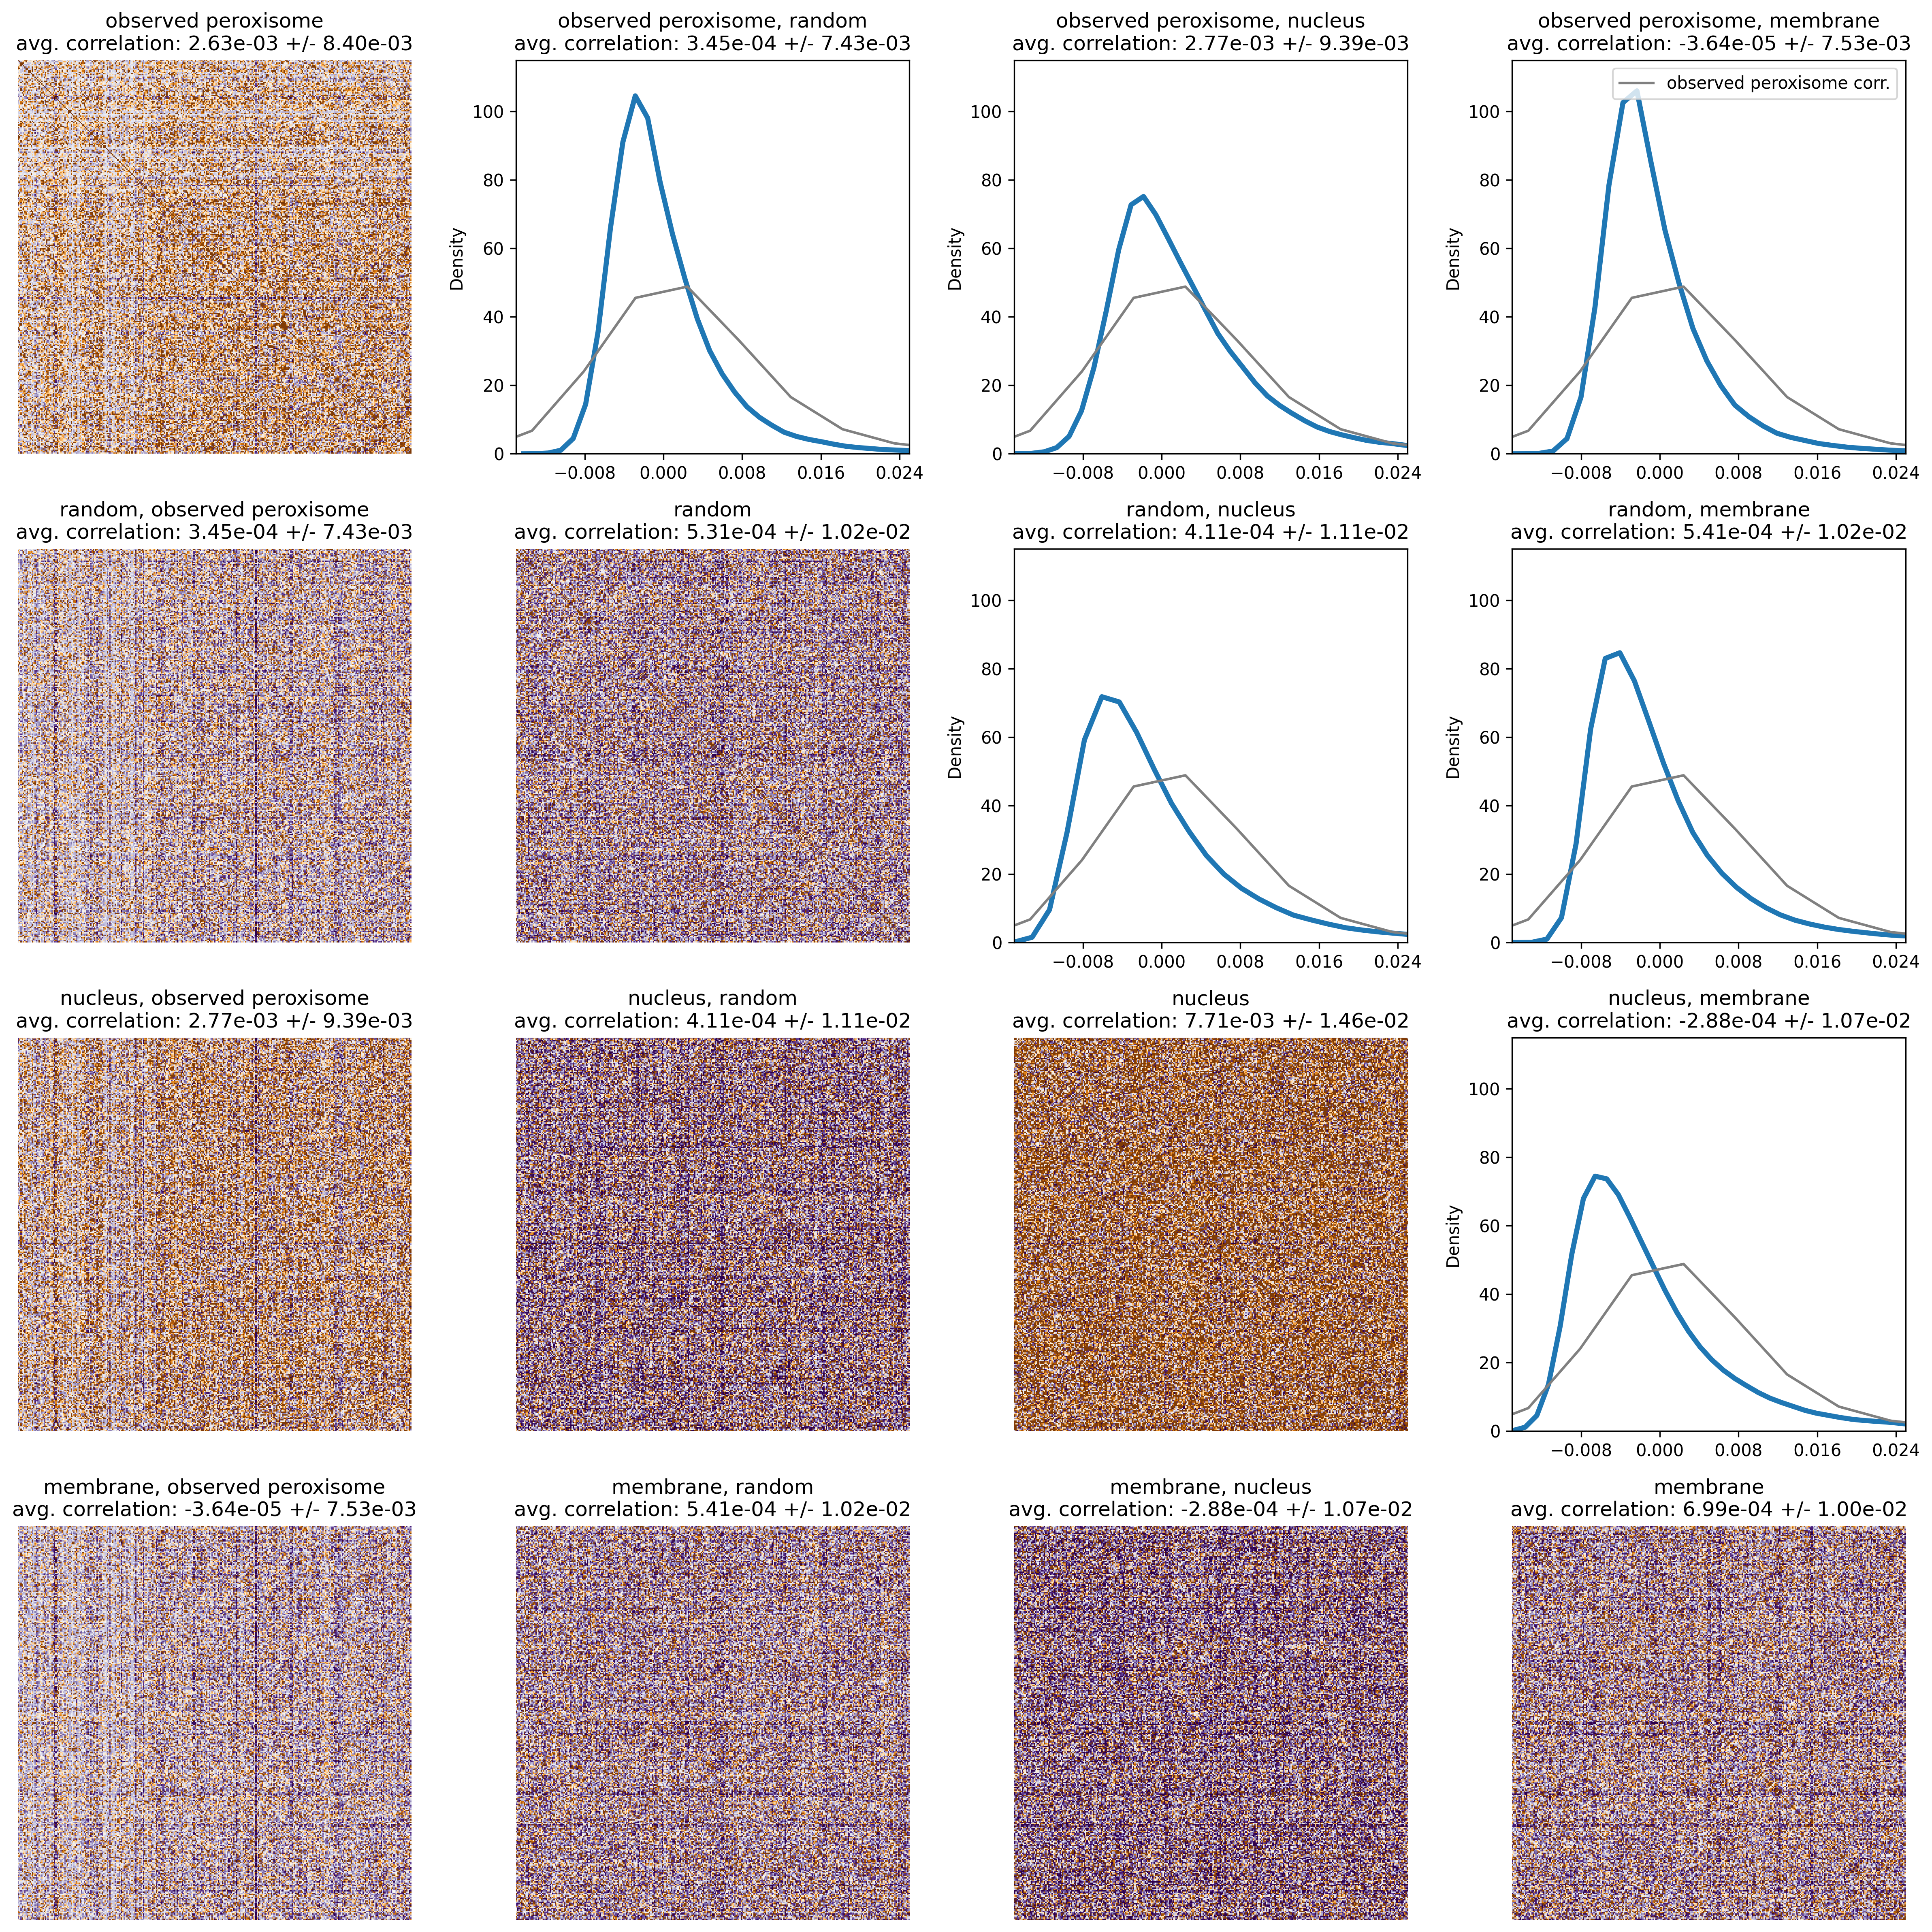

In [32]:
# get_upper diagonal values
num_channels = len(channels_to_use)
fig, axs = plt.subplots(nrows=num_channels, ncols=num_channels, figsize=(4 * num_channels, 4 * num_channels), dpi=300)
raw_corr_vals = df_clean.loc[STRUCTURE_ID, STRUCTURE_ID].values.flatten()
for ct, ch in enumerate(channels_to_use):
    for ct2, ch2 in enumerate(channels_to_use):
        ax = axs[ct, ct2]
        all_corr_vals = df_clean.loc[ch, ch2].values
        flat_corr_vals = all_corr_vals.flatten()
        cross_corr_vals = all_corr_vals[np.triu_indices(all_corr_vals.shape[0], k=1)]
        if ct >= ct2:
            ax.imshow(-all_corr_vals, cmap="PuOr", vmin=-0.008, vmax=0.008)
            ax.set_aspect("equal")
            ax.axis("off")
        else:
            mean_corr_val = np.mean(flat_corr_vals)
            std_corr_val = np.std(flat_corr_vals)
            axs[ct, ct2] = sns.kdeplot(
                flat_corr_vals,
                ax=ax,
                linewidth=3,
                # bw_adjust=1.5,
            )
            ax = axs[ct, ct2]
            axs[ct, ct2] = sns.kdeplot(
                raw_corr_vals,
                ax=ax,
                linewidth=1.5,
                color="gray",
                label=f"{channel_name_dict[STRUCTURE_ID]} corr.",
                # bw_adjust=1.5,
            )
            ax = axs[ct, ct2]
            # ax.axvline(mean_corr_val, color="red", linestyle="--", label=f"mean = {mean_corr_val:.3e}", alpha=0.5)
            # add shaded patch for std
            # ax.axvspan(mean_corr_val - std_corr_val, mean_corr_val + std_corr_val, alpha=0.2, color="red", label=f"std = {std_corr_val:.3e}")
            if ct == 0 and ct2 == axs.shape[1] - 1:
                ax.legend(loc="upper right")
            ax.set_ylabel("Density")
            ax.xaxis.set_major_locator(MaxNLocator(5))
            xlim =[-0.015, 0.025]
            ax.set_xlim(xlim)
            ymax = 115
            ax.set_ylim([0, ymax])
            ax.set_aspect((xlim[1] - xlim[0]) / ymax, adjustable='box')
        if ch == ch2:
            ax.set_title(
                f"{channel_name_dict[ch]}\navg. correlation: {np.mean(cross_corr_vals):.2e} +/- {np.std(cross_corr_vals):.2e}"
            )
        else:
            ax.set_title(f"{channel_name_dict[ch]}, {channel_name_dict[ch2]}\navg. correlation: {np.mean(flat_corr_vals):.2e} +/- {np.std(flat_corr_vals):.2e}")
# fig.supxlabel("Individual PILR Correlation")
plt.tight_layout()
plt.show()
# fig.savefig(save_dir / f"individual_PILR_corr_hist_title.png", bbox_inches="tight")

### Create violin plots of individual correlation values

In [33]:
df_clean.loc[STRUCTURE_ID].shape

(305, 1220)

In [34]:
df_flat = pd.DataFrame(
    index=np.arange(df_clean.loc[STRUCTURE_ID].shape[0] ** 2),
    columns=[channel_name_dict[ch] for ch in channels_to_use],
)

In [36]:
for col in channels_to_use:
    all_corr_vals = df_clean.loc[STRUCTURE_ID, col].values
    col_name = channel_name_dict[col]
    if col==STRUCTURE_ID:
        cross_corr_vals = all_corr_vals[np.triu_indices(all_corr_vals.shape[0], k=1)]
        df_flat.loc[np.arange(len(cross_corr_vals)), col_name] = cross_corr_vals.flatten()
    else:
        df_flat[col_name] = all_corr_vals.flatten()

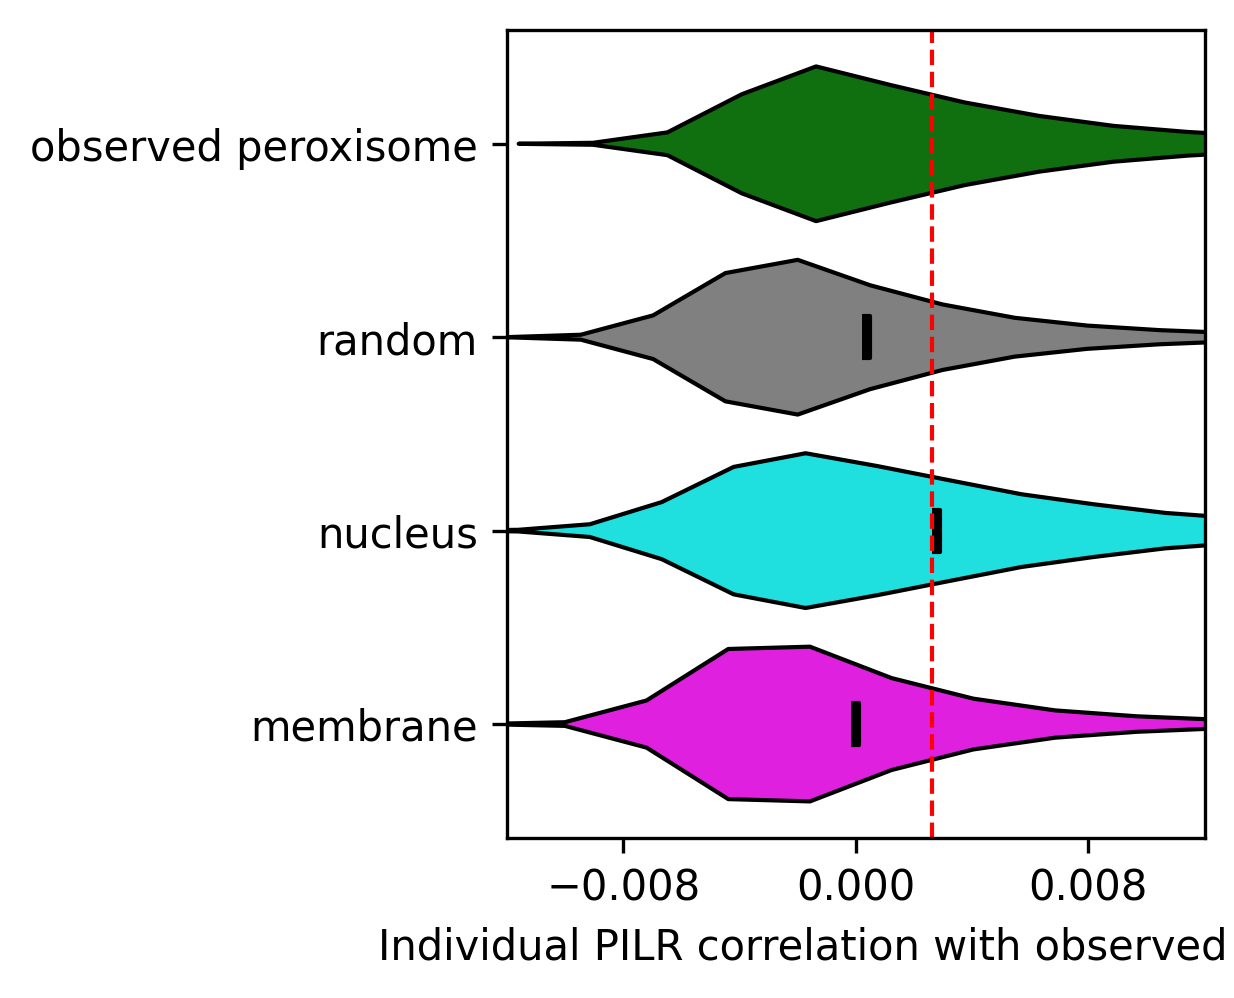

In [37]:
fig, ax = plt.subplots(figsize=(3, 3.5), dpi=300)
ax = sns.violinplot(
    data=df_flat,
    orient="h",
    ax=ax,
    palette=color_dict,
    # bw_adjust=5,
    inner=None,
    cut=0,
    linewidth=1,
    linecolor="k",
    # inner_kws={
    #     "box_width": 8,
    #     "whis_width": 1,
    # },
)
ax.set_xlabel("Individual PILR correlation with observed data")
# ax.yaxis.set_ticks([])
ax.set_xlim([-0.012, 0.012])
for ct, col in enumerate(df_flat.columns):
    if col == channel_name_dict[STRUCTURE_ID]:
        continue
    ax.scatter(
        df_flat[col].mean(),
        ct,
        # color=color_dict[col],
        s=100,
        color="k",
        # marker="|",
        marker=[
            (-1, -5),
            (1, -5),
            (1, 5),
            (-1, 5),
        ],
    )
ax.axvline(df_flat[channel_name_dict[STRUCTURE_ID]].mean(), color="r", linestyle="--", linewidth=1)
ax.xaxis.set_major_locator(MaxNLocator(3))
fig.savefig(save_dir / f"individual_PILR_corr_violin.png", bbox_inches="tight")
plt.show()

plot density of correlation values for each individual channel

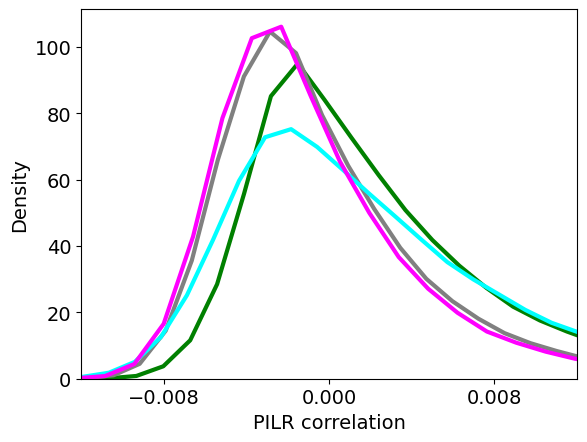

In [43]:
channel_hist_dir = save_dir / "channel_PILR_corr_hist"
channel_hist_dir.mkdir(parents=True, exist_ok=True)

plt.rcParams.update({"font.size": 16})
for col in df_flat.columns:
    fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
    ax = sns.kdeplot(
        df_flat[col],
        linewidth=3,
        color=color_dict[col],
        ax=ax,
    )
    ax.set_xlabel("PILR correlation")
    ax.set_ylabel("Density")
    ax.set_xlim([-0.012, 0.012])
    ax.set_xticks([-0.008, 0, 0.008])
